# Data Description
Earliest_cr_line :The month the borrower's earliest reported credit line was opened

Emp_title :The job title supplied by the Borrower when applying for the loan.

Fico_range_high :The upper boundary range the borrower’s FICO at loan origination belongs to.

Fico_range_low :The lower boundary range the borrower’s FICO at loan origination belongs to.

Grade :LC assigned loan grade

Application_type :Indicates whether the loan is an individual application or a joint application with two co-borrowers.

Initial_list_status :The initial listing status of the loan. Possible values are – W, F

Num_actv_bc_tl :Number of currently active bankcard accounts.

Mort_acc :Number of mortgage accounts.

Tot_cur_bal :Total current balance of all accounts.

Open_acc :The number of open credit lines in the borrower's credit file.

Pub_rec :Number of derogatory public records.

pub_rec_bankruptcies :Number of public record bankruptcies.

Purpose :A category provided by the borrower for the loan request.

revol_bal :Total credit revolving balance

Title :The loan title provided by the borrower

total_acc :The total number of credit lines currently in the borrower's credit file.

verification_status :Indicates if income was verified by LC, not verified, or if the income source was verified.

addr_state :The state provided by the borrower in the loan application.

annual_inc :The self-reported annual income provided by the borrower during registration.

emp_length :Employment length in years. Possible values are between 0 and 10 where
0 means less than one year and 10 means ten or more years.

home_ownership :The home ownership status provided by the borrower during registration.
Our values are: RENT, OWN, MORTGAGE, OTHER.

int_rate :Interest Rate on the loan

loan_amnt :The listed amount of the loan applied for by the borrower. If at some point
in time, the credit department reduces the loan amount, then it will be reflected in this value.

sub_grade :LC assigned loan subgrade.

Term :The number of payments on the loan. Values are in months and can be either 36 or 60.

revol_util :Revolving line utilization rate, or the amount of credit the borrower is
using relative to all available revolving credit.

Target
loan_status :Status of the loan.

In [1]:
# importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("C:/Users/Sheenu/Downloads/train_loan_data (1).csv")

# Understanding Data


In [3]:
#getting first five rows of the dataset
df.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


In [4]:
#name of the columns in dataset
df.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [5]:
# len of the dataset
len(df)

80000

In [6]:
# total number of  rows and columns
df.shape


(80000, 28)

In [7]:
# checking if any duplicacy in dataset
df.duplicated().sum()

0

In [8]:
# counts of categories in loan_status
df.loan_status.value_counts()

loan_status
Paid         64030
Defaulted    15970
Name: count, dtype: int64

In [9]:
# counts of categoeis in home_ownership
df.home_ownership.value_counts()

home_ownership
MORTGAGE    39628
RENT        31688
OWN          8654
ANY            19
OTHER           7
NONE            4
Name: count, dtype: int64

In [10]:
# counts of categories in application_type
df.application_type.value_counts()

application_type
Individual    78446
Joint App      1554
Name: count, dtype: int64

In [11]:
# counts of categories in verification_status
df.verification_status.value_counts()

verification_status
Source Verified    30855
Verified           24876
Not Verified       24269
Name: count, dtype: int64

In [12]:
# descriptive data analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [13]:
# Statistic analysis
df.describe()

,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,76052.000000,77229.000000,7.605200e+04,80000.000000,80000.000000,79969.000000,8.000000e+04,79947.000000,80000.000000
mean,7.604614e+04,699.987975,695.987813,13.232898,14403.867813,3.633790,1.674759,1.415864e+05,11.605675,0.216675,0.137103,1.628934e+04,51.899142,25.036875
std,6.902006e+04,31.734840,31.734075,4.771705,8703.826298,2.262505,2.005104,1.593714e+05,5.483362,0.579854,0.383202,2.264915e+04,24.504836,12.009194
min,0.000000e+00,664.000000,660.000000,5.310000,750.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,4.600000e+04,674.000000,670.000000,9.750000,7925.000000,2.000000,0.000000,2.964200e+04,8.000000,0.000000,0.000000,5.965750e+03,33.500000,16.000000
50%,6.500000e+04,694.000000,690.000000,12.740000,12000.000000,3.000000,1.000000,8.100050e+04,11.000000,0.000000,0.000000,1.111100e+04,52.200000,23.000000
75%,9.000000e+04,714.000000,710.000000,15.990000,20000.000000,5.000000,3.000000,2.110272e+05,14.000000,0.000000,0.000000,1.963500e+04,70.800000,32.000000
max,7.141778e+06,850.000000,845.000000,30.990000,40000.000000,32.000000,32.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,162.000000


In [14]:
# object columns will help to get the insight of categorical data in dataset
df.describe(include="O")

,addr_state,earliest_cr_line,emp_length,emp_title,grade,home_ownership,application_type,initial_list_status,purpose,sub_grade,term,title,verification_status,loan_status
count,80000,80000,75412,74982,80000,80000,80000,80000,80000,80000,80000,79030,80000,80000
unique,51,640,11,36661,7,6,2,2,14,35,2,5348,3,2
top,CA,Sep-03,10+ years,Teacher,B,MORTGAGE,Individual,w,debt_consolidation,C1,36 months,Debt consolidation,Source Verified,Paid
freq,11744,547,26278,1278,23502,39628,78446,46745,46418,4982,60750,39396,30855,64030


In [15]:
# missing values
df.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [16]:
df.isnull().sum()/len(df)*100

addr_state              0.00000
annual_inc              0.00000
earliest_cr_line        0.00000
emp_length              5.73500
emp_title               6.27250
fico_range_high         0.00000
fico_range_low          0.00000
grade                   0.00000
home_ownership          0.00000
application_type        0.00000
initial_list_status     0.00000
int_rate                0.00000
loan_amnt               0.00000
num_actv_bc_tl          4.93500
mort_acc                3.46375
tot_cur_bal             4.93500
open_acc                0.00000
pub_rec                 0.00000
pub_rec_bankruptcies    0.03875
purpose                 0.00000
revol_bal               0.00000
revol_util              0.06625
sub_grade               0.00000
term                    0.00000
title                   1.21250
total_acc               0.00000
verification_status     0.00000
loan_status             0.00000
dtype: float64

In [17]:
# dropping missing values
df.dropna(axis=0,inplace=True)


In [18]:
# Verify if there are any remaining missing values
print(df.isnull().sum())

addr_state              0
annual_inc              0
earliest_cr_line        0
emp_length              0
emp_title               0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
title                   0
total_acc               0
verification_status     0
loan_status             0
dtype: int64


In [19]:
df.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


In [20]:
df.shape

(70375, 28)

# checking correlation between the features

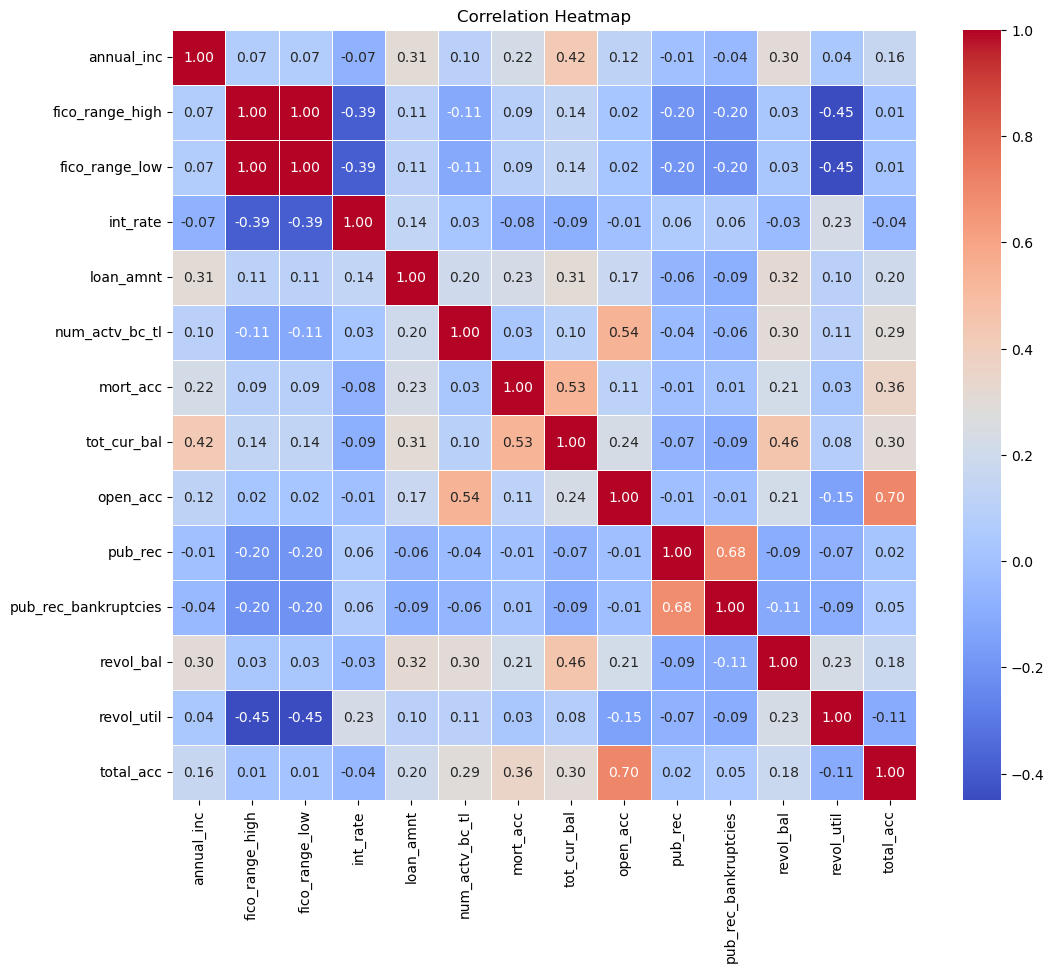

In [21]:
#heat map
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

ValueError: num must be an integer with 1 <= num <= 9, not 10

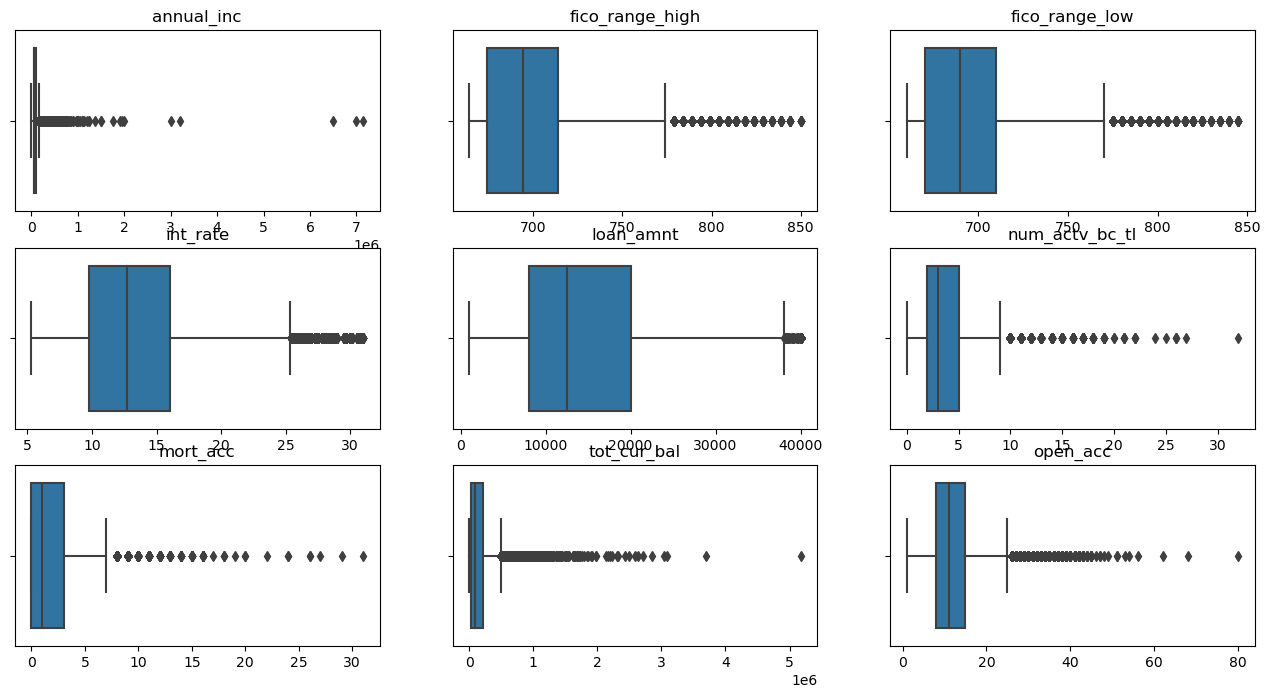

In [22]:
numeric_cols = df.select_dtypes(include='number').columns
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [23]:
def outlier_treatment(dataframe):
    # Select only numeric columns
    numeric_df = dataframe.select_dtypes(include=['number'])
    
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply outlier detection to each numerical column
    outlier_mask = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)

    # Filter the dataframe to remove rows with outliers
    df_rem_out = dataframe[~outlier_mask]
    
    return df_rem_out

# Apply the outlier treatment function to your DataFrame
df = outlier_treatment(df)

In [24]:
df.shape

(46136, 28)

In [25]:
df.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
6,NY,100000.0,Oct-86,10+ years,RN,699,695,C,MORTGAGE,Individual,...,0.0,credit_card,32488,54.1,C1,36 months,Credit card refinancing,36,Verified,Paid


# EDA

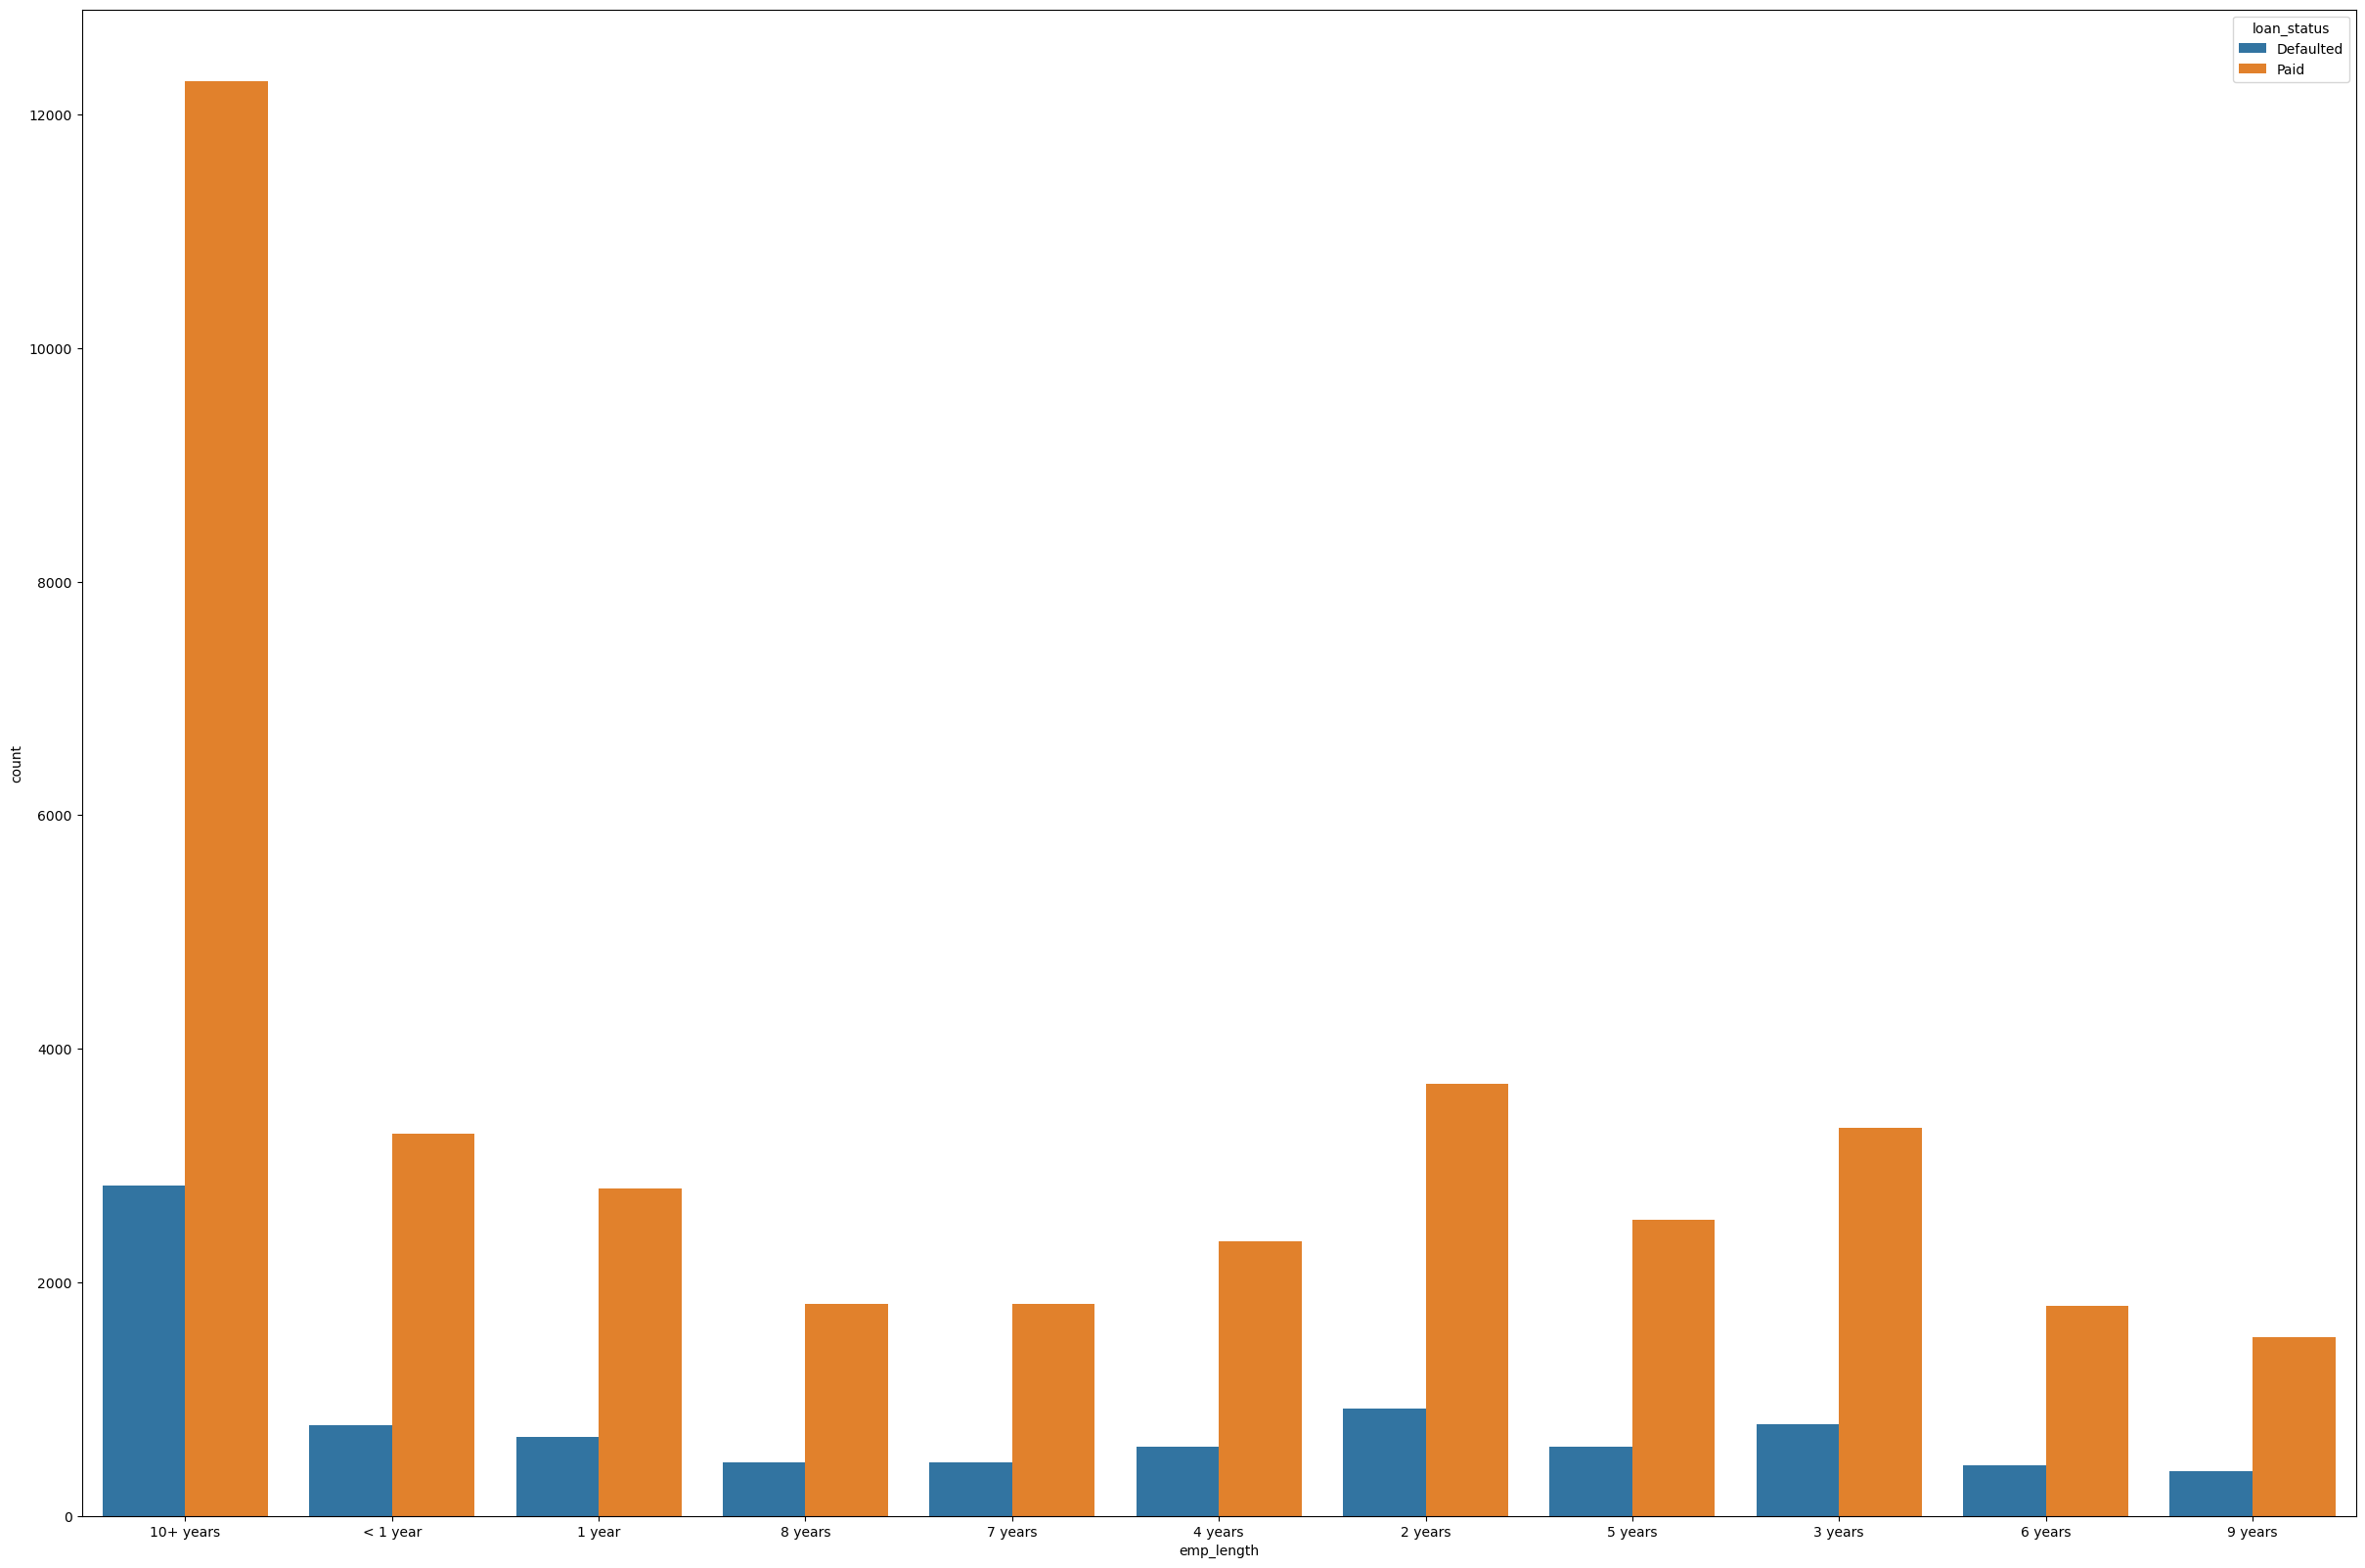

In [26]:
# data visivalization in related to loan_status
plt.figure(figsize=(30,20))
sns.countplot(data=df,x="emp_length",hue="loan_status")
plt.show()

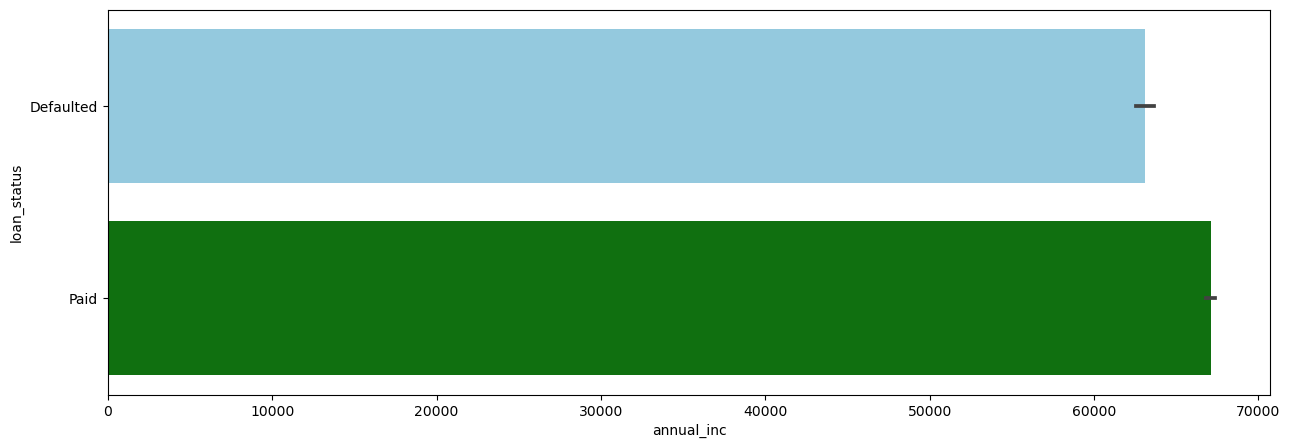

In [27]:
# people with more annual income have paid the loan
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="annual_inc",y="loan_status",palette=["skyblue", "green"])
plt.show()

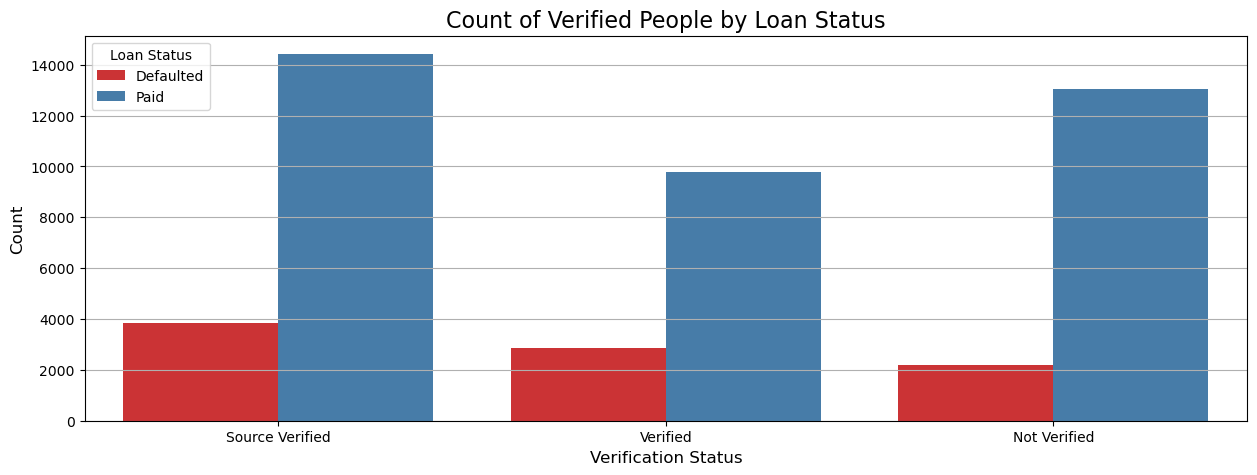

In [28]:
# count of verified people
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="verification_status", hue="loan_status", palette="Set1")
plt.title("Count of Verified People by Loan Status", fontsize=16)
plt.xlabel("Verification Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Loan Status", fontsize=10)
plt.grid(axis="y")
plt.show()

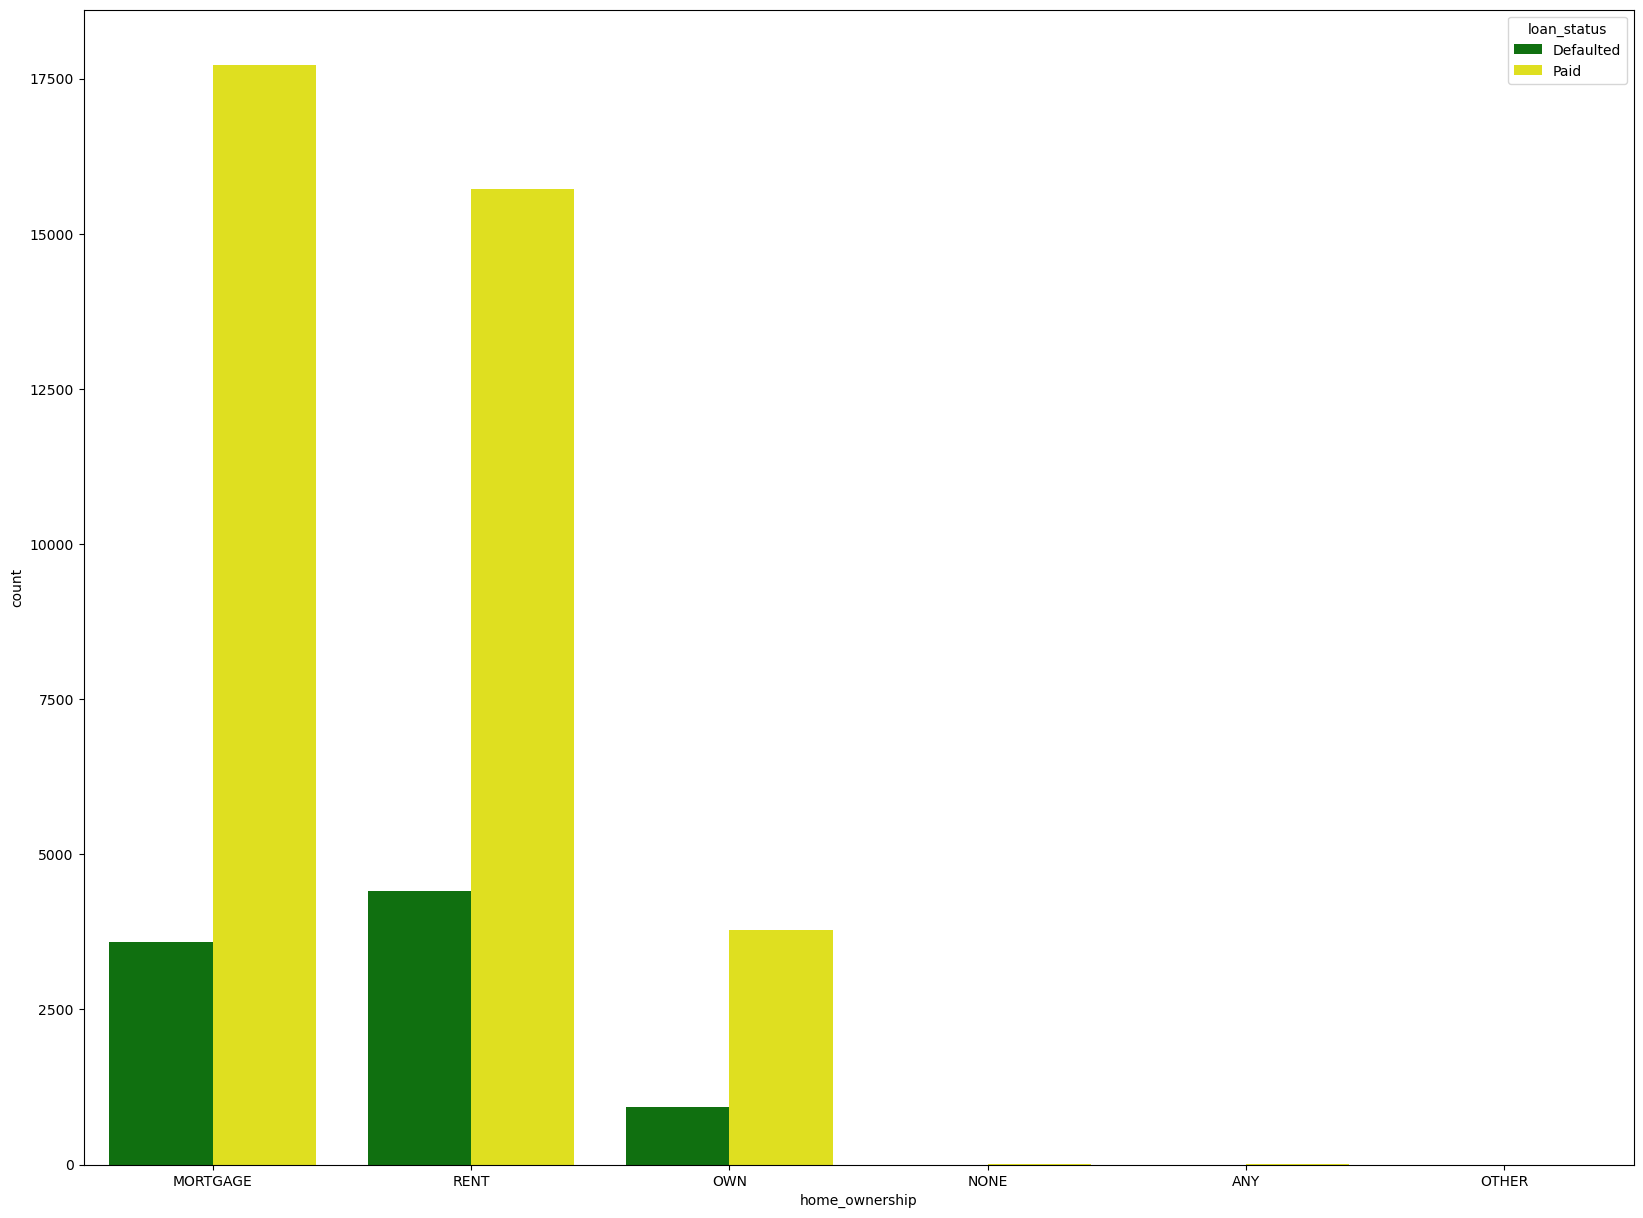

In [29]:
plt.figure(figsize=(20,15))
sns.countplot(data=df,x="home_ownership",hue="loan_status",palette=["green", "yellow"])
plt.show()

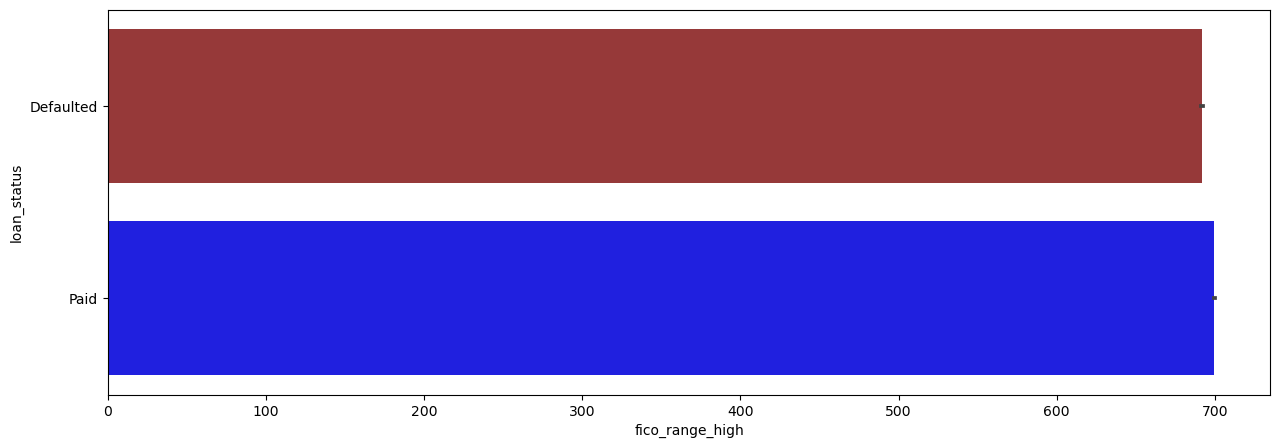

In [30]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="fico_range_high",y="loan_status", palette=["brown", "blue"])
plt.show()

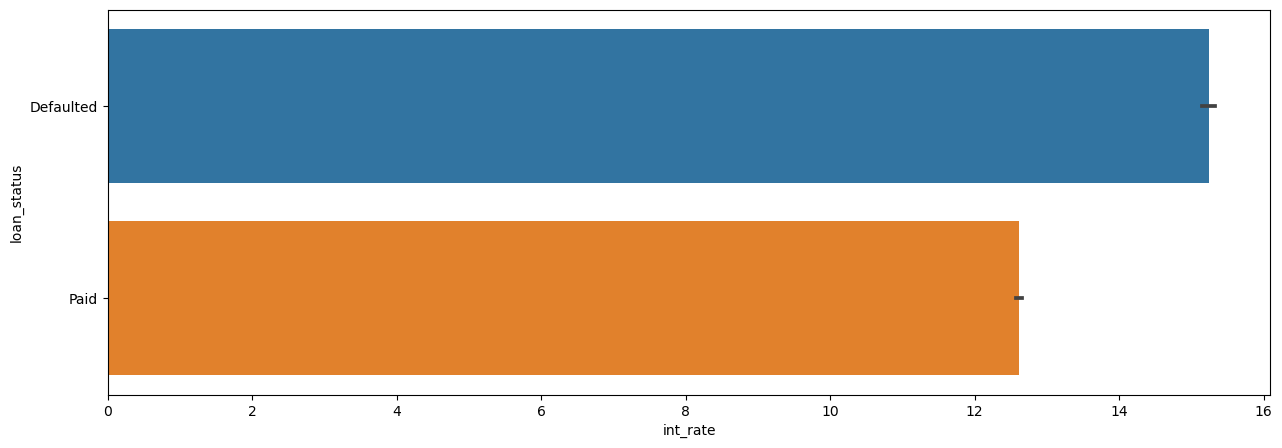

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="int_rate",y="loan_status")
plt.show()

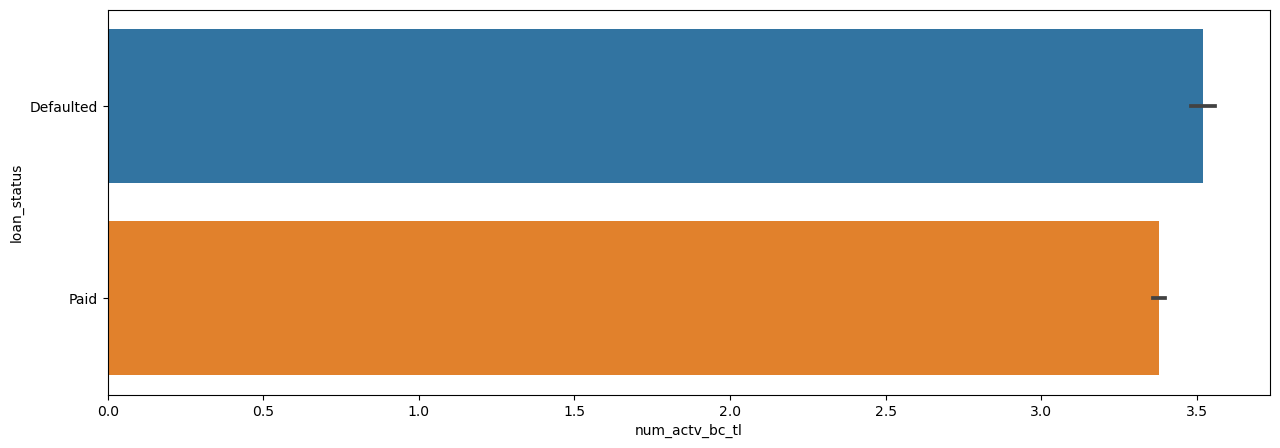

In [32]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="num_actv_bc_tl",y="loan_status")
plt.show()

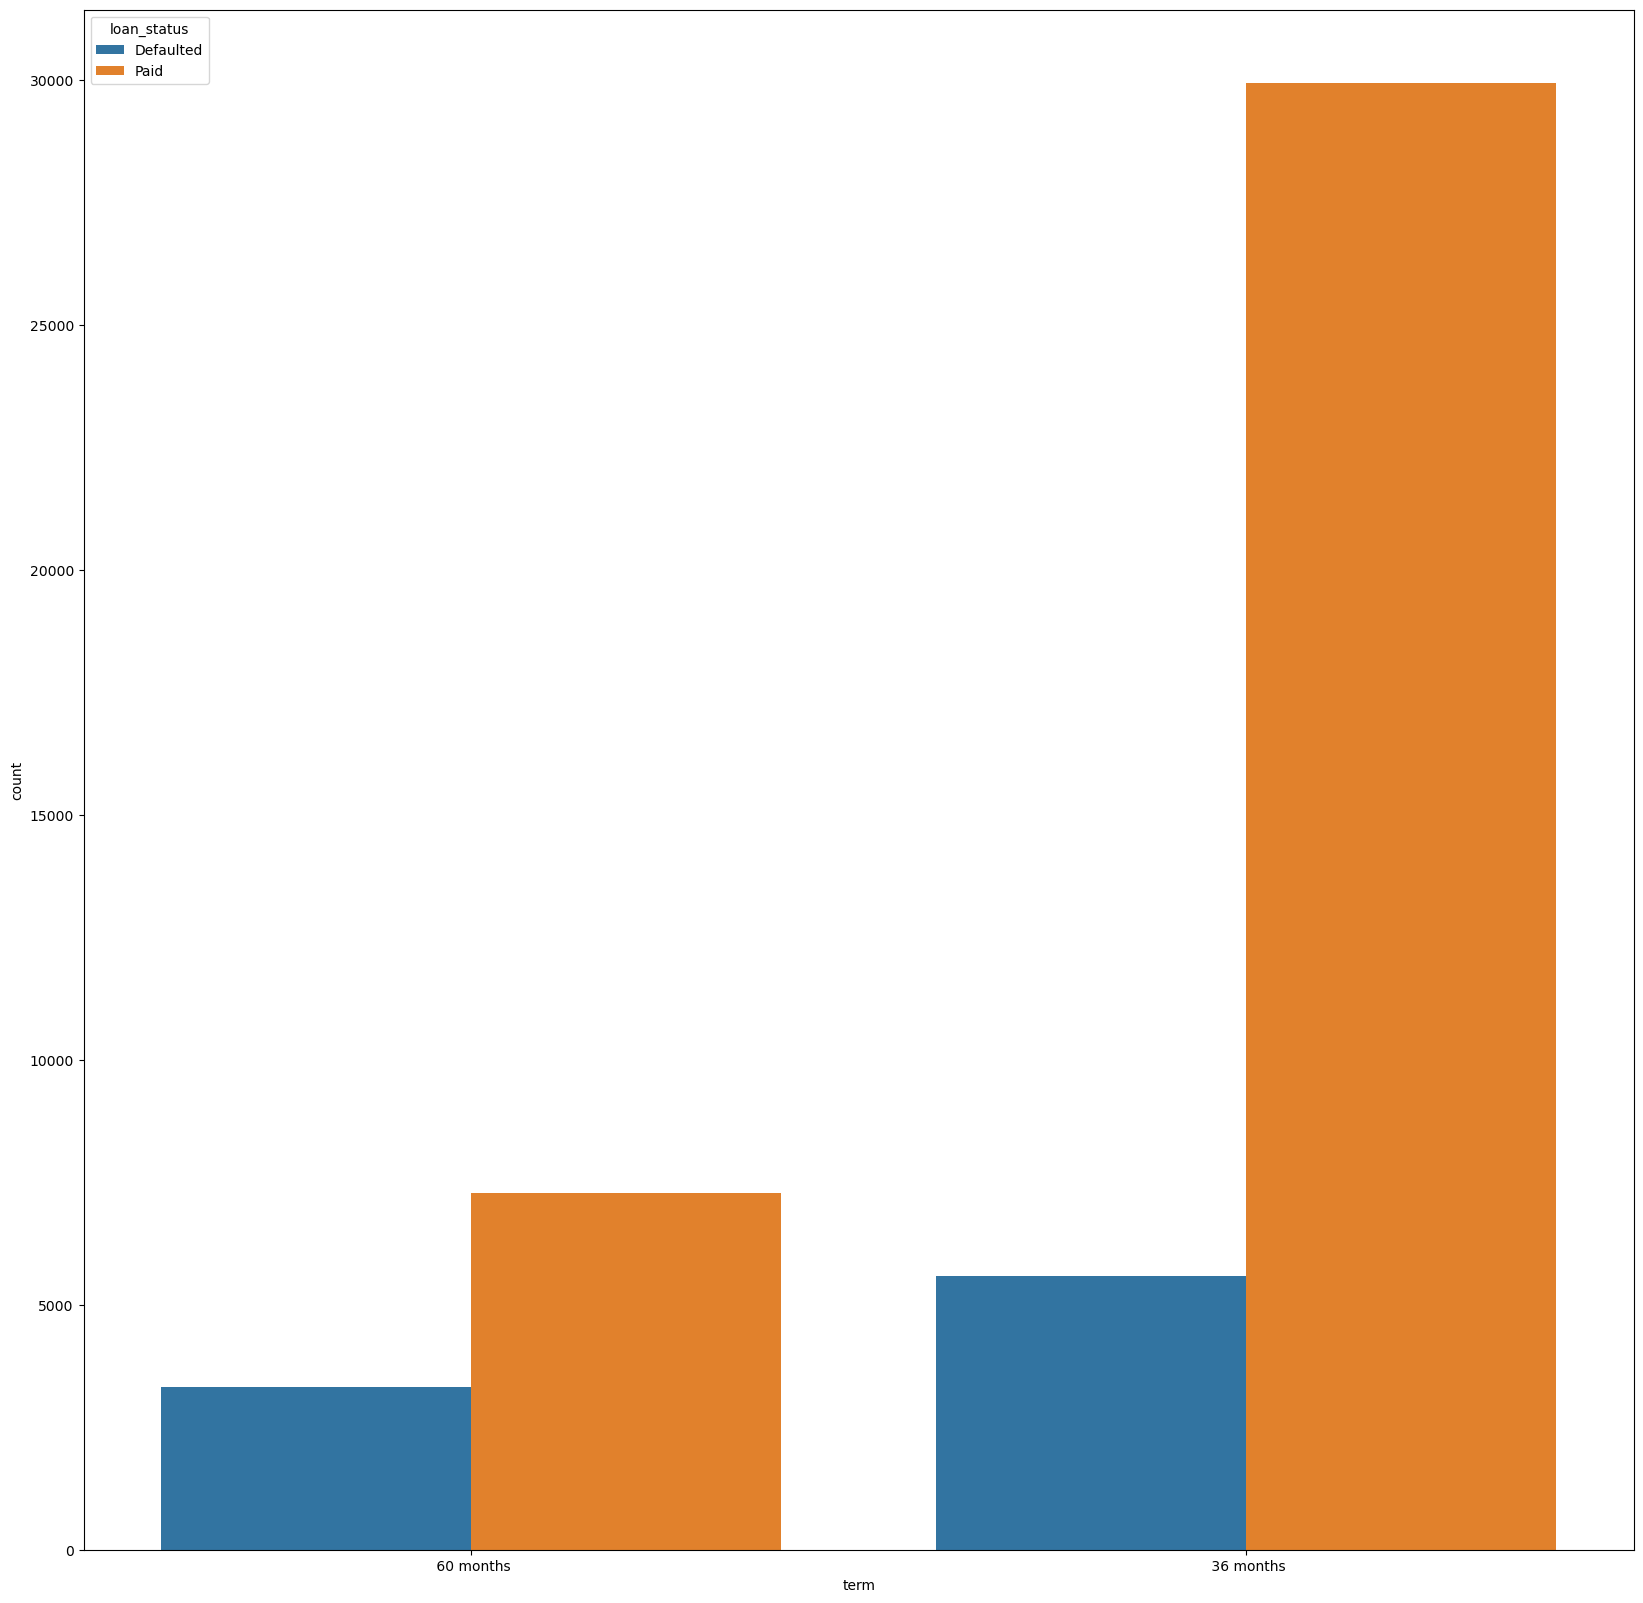

In [33]:

plt.figure(figsize=(20,20))
sns.countplot(data=df,x="term",hue="loan_status")
plt.show()

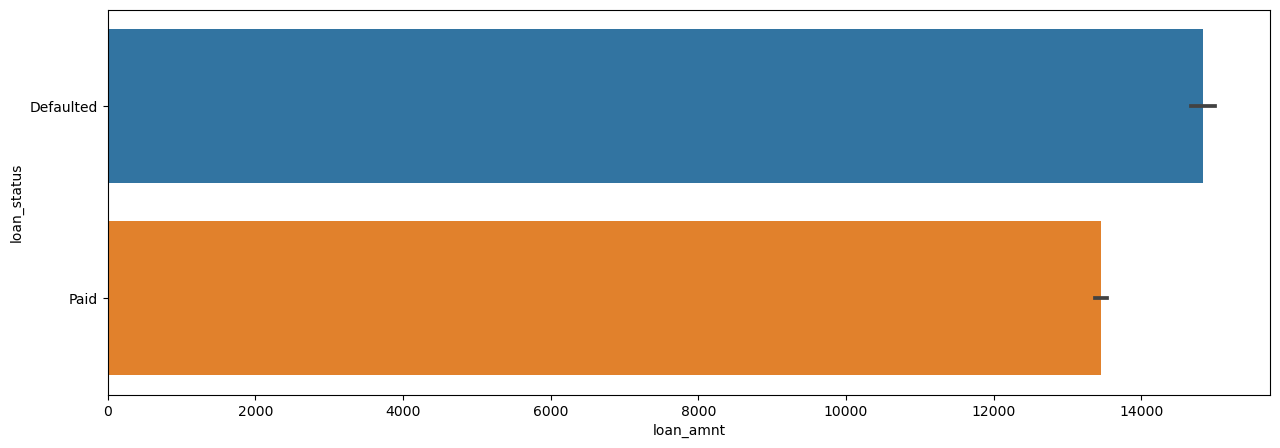

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="loan_amnt",y="loan_status")
plt.show()

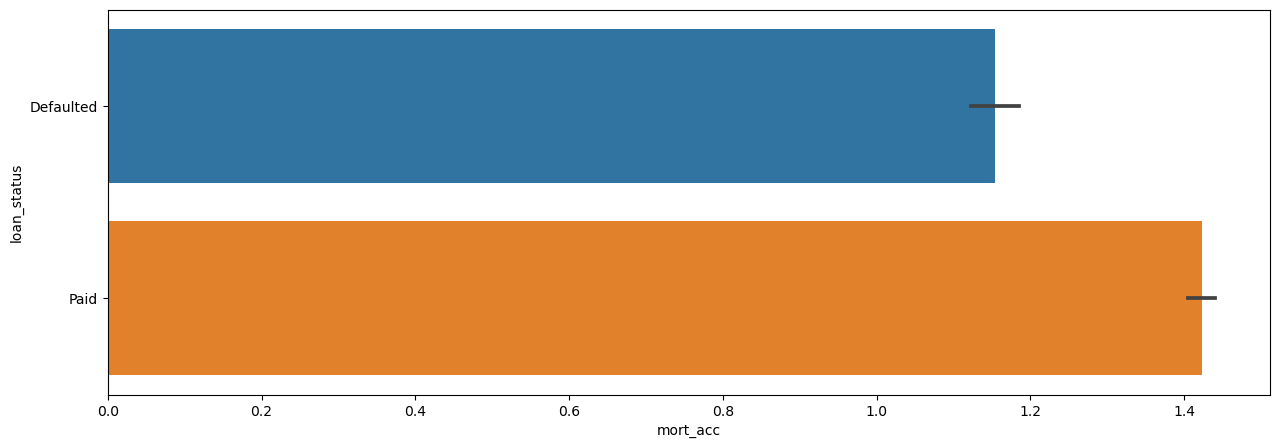

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="mort_acc",y="loan_status")
plt.show()


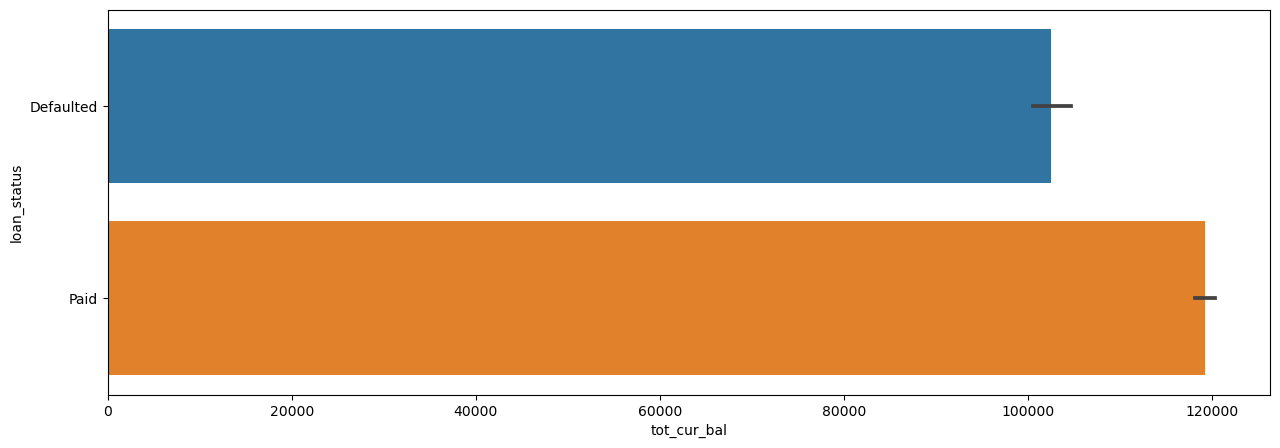

In [36]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="tot_cur_bal",y="loan_status")
plt.show()

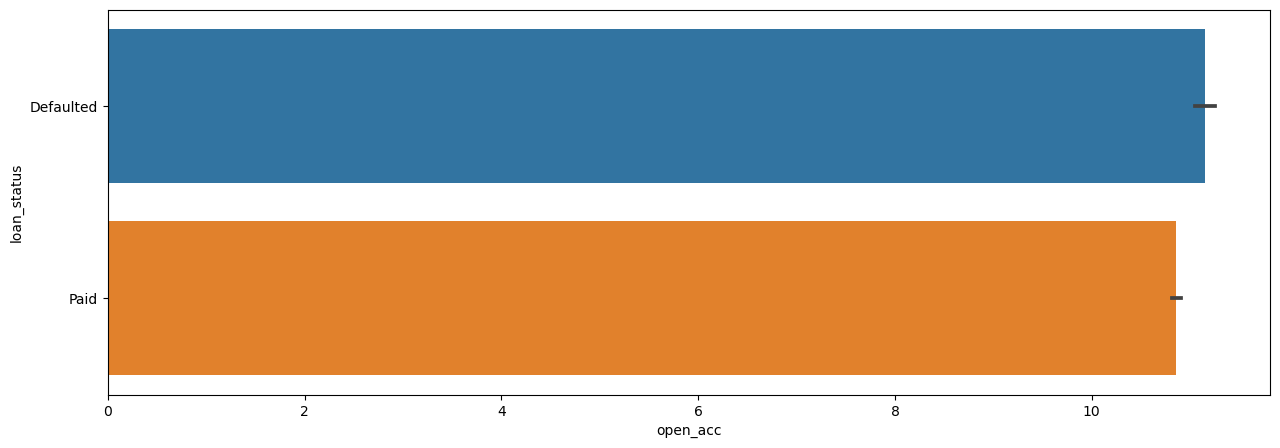

In [37]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="open_acc",y="loan_status")
plt.show()

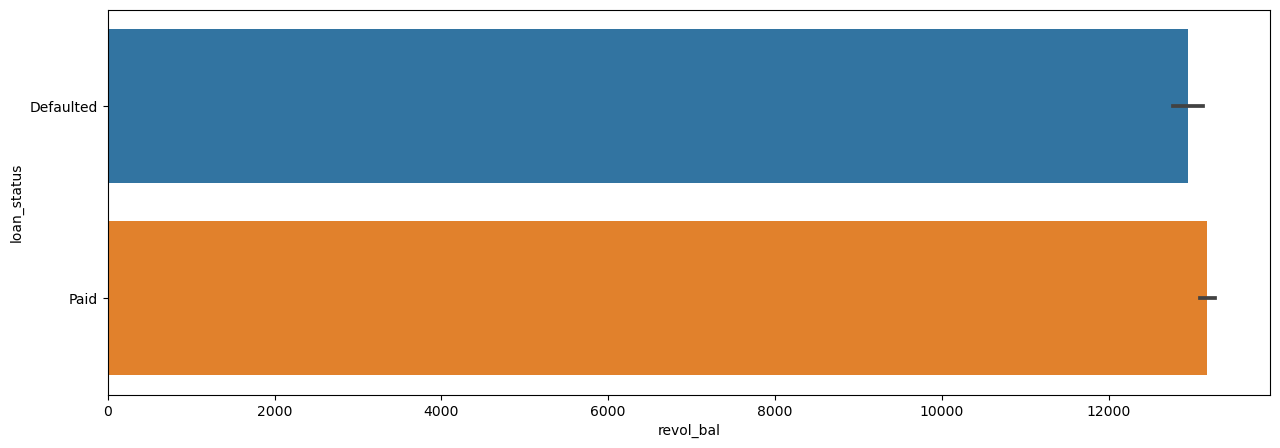

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="revol_bal",y="loan_status")
plt.show()


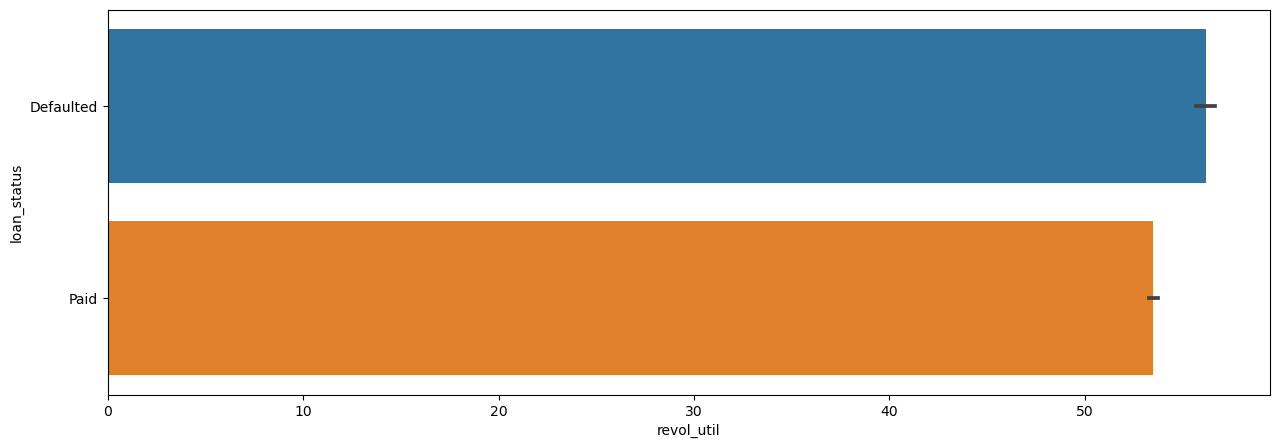

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="revol_util",y="loan_status")
plt.show()


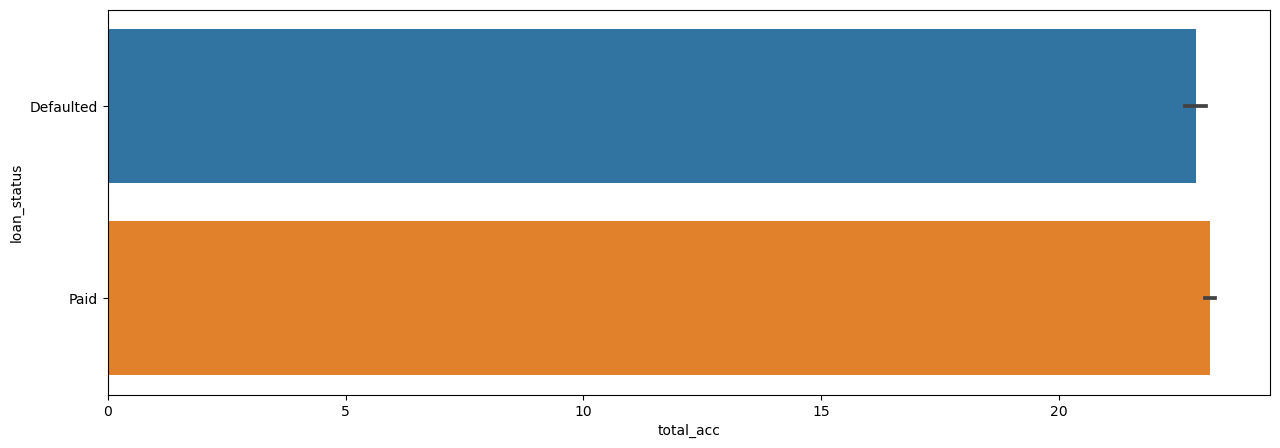

In [40]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="total_acc",y="loan_status")
plt.show()

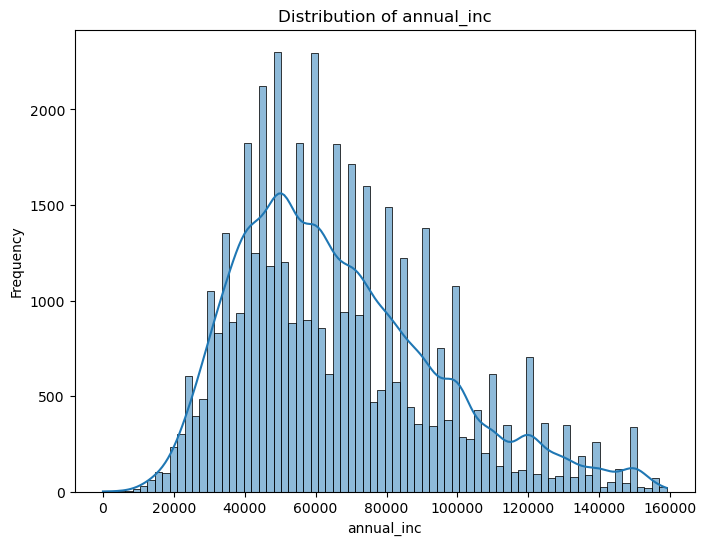

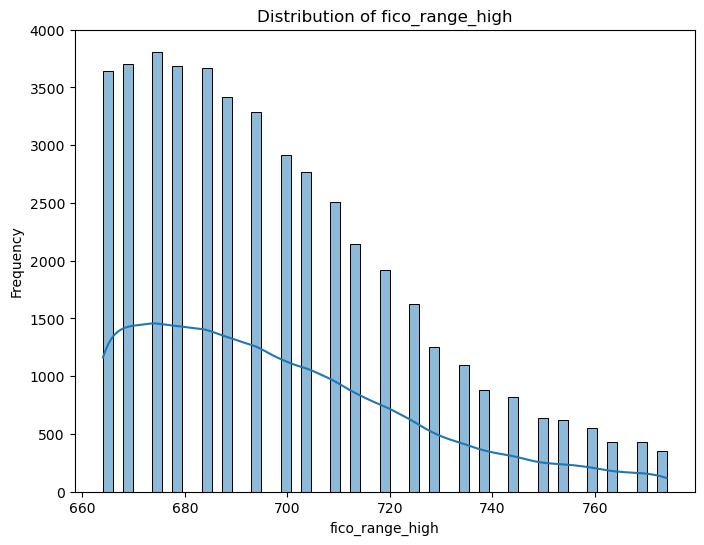

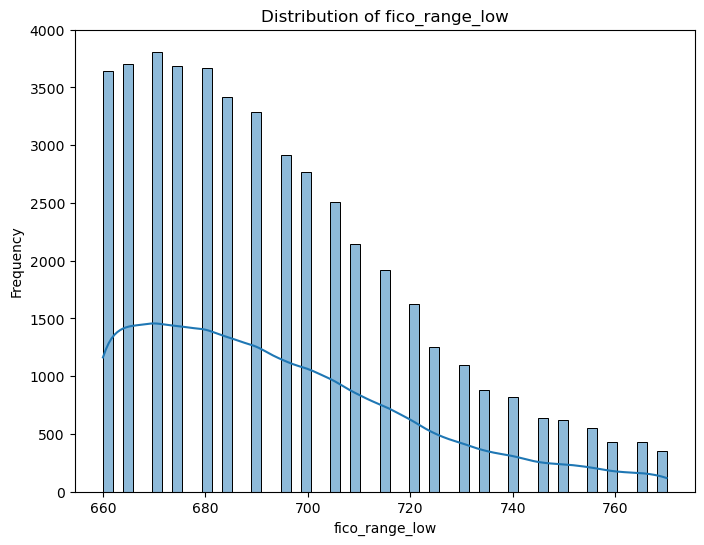

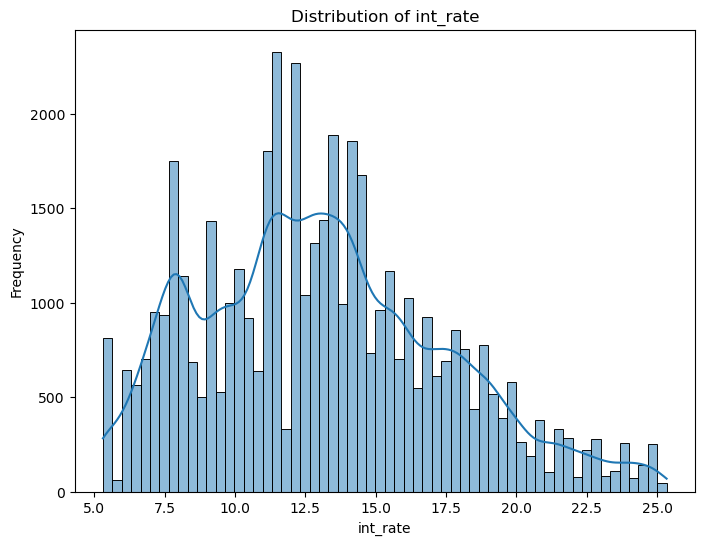

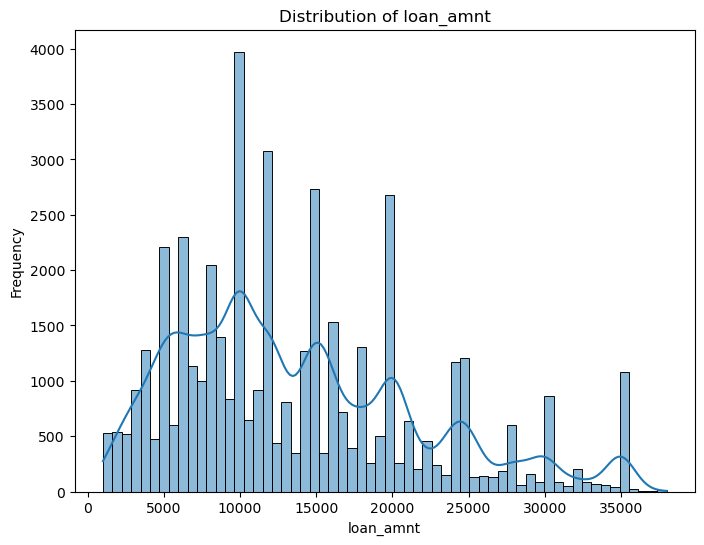

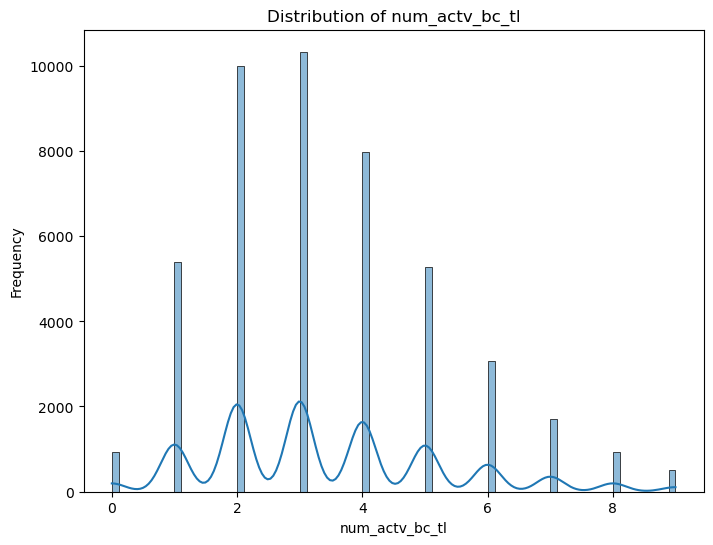

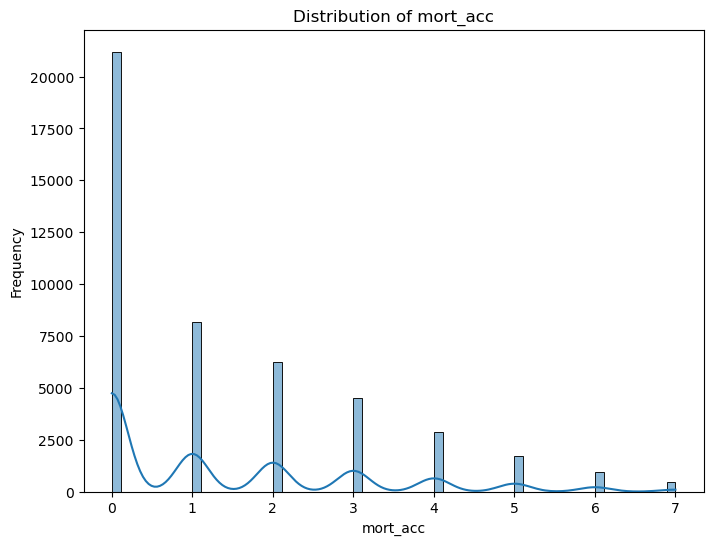

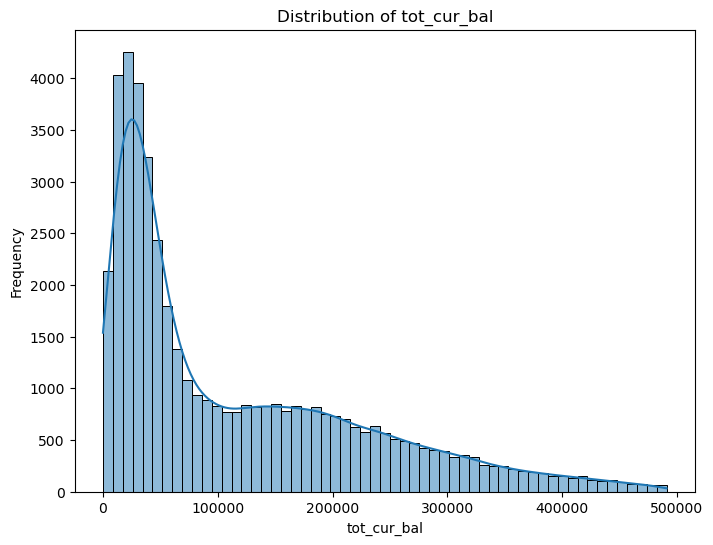

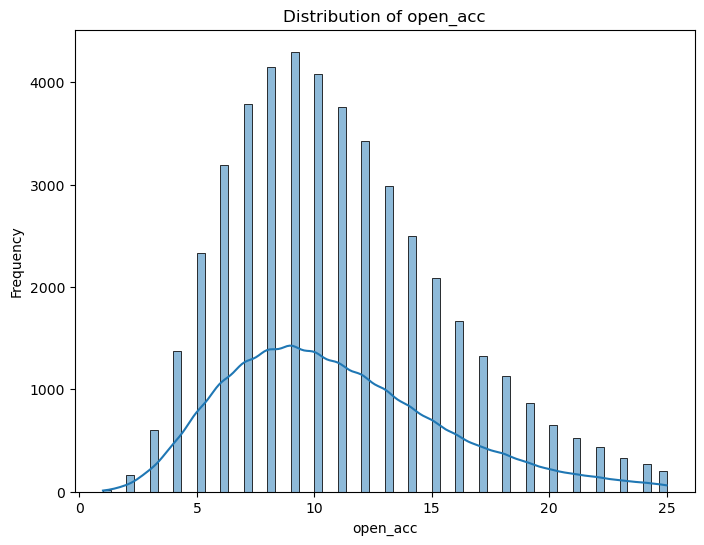

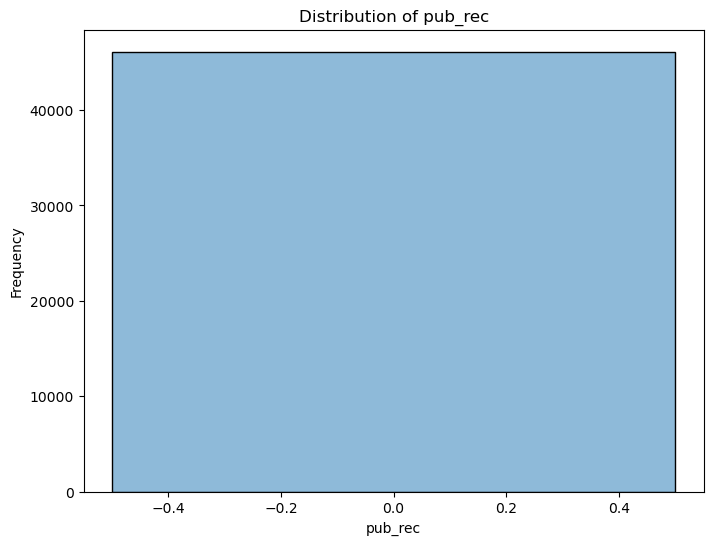

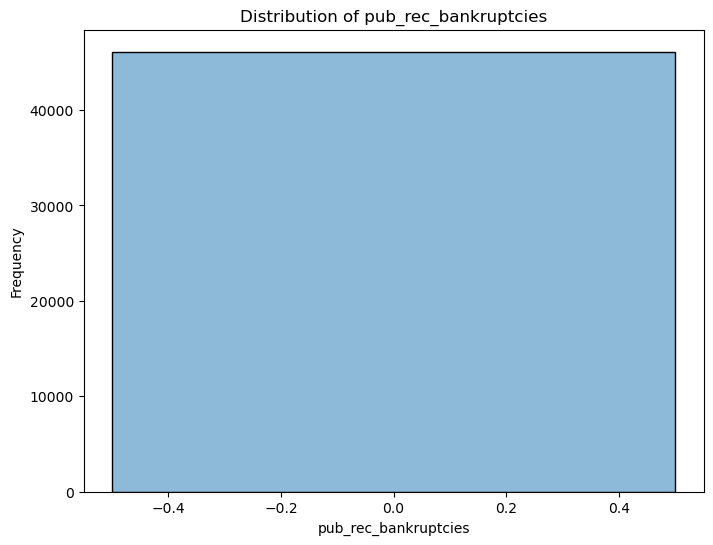

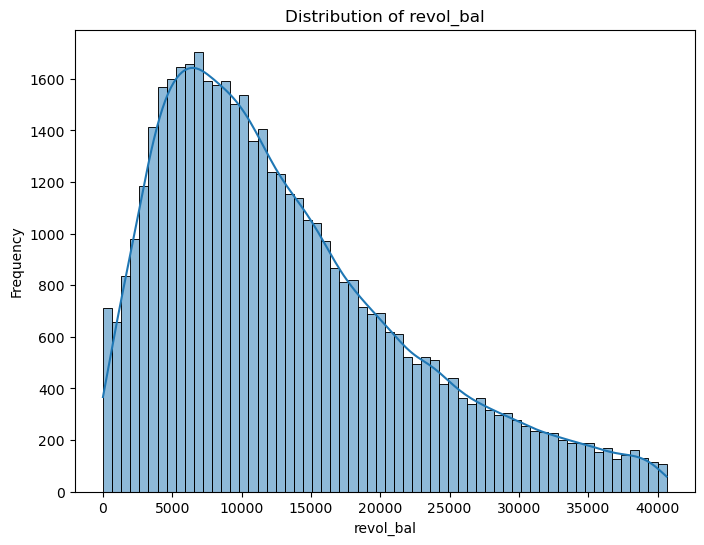

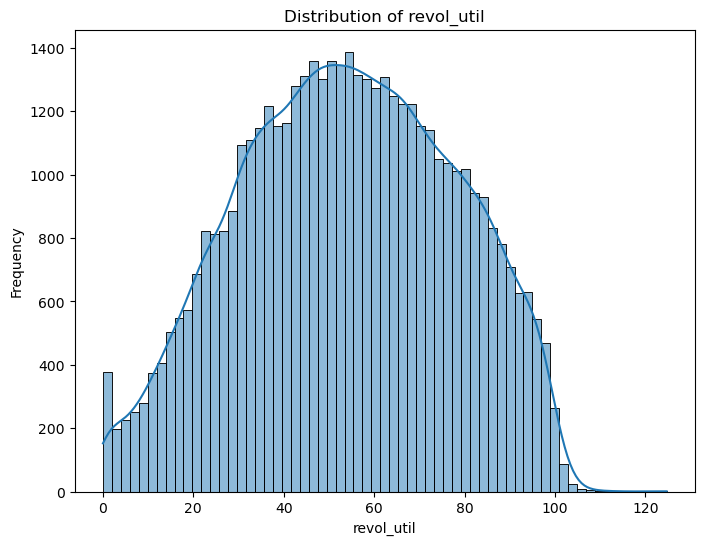

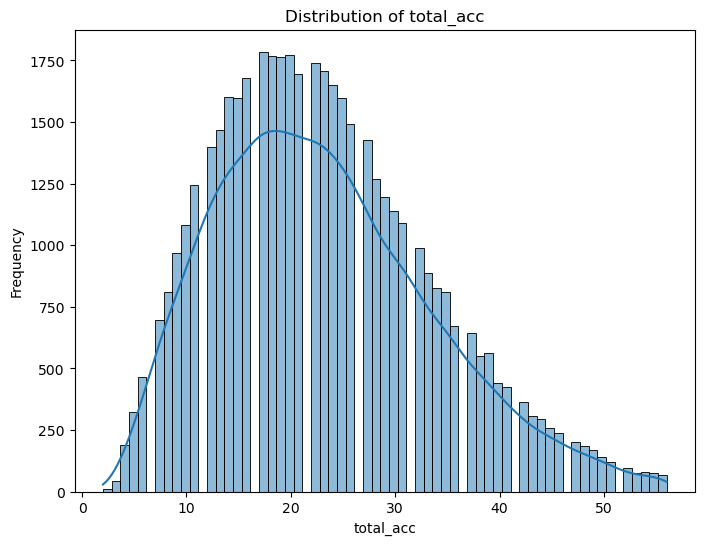

In [41]:
numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [42]:
# Separating the numerical and categorical columns
def data_type(df):
    numerical = []
    categorical = []
    for i in df.columns:
        if df[i].dtype == 'int64' or df[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(df)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(df)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(df, categorical):
    for i in categorical:
        df[i] = df[i].astype('category')
        df[i] = df[i].cat.codes
    return df

df = encoding(df, categorical)

In [43]:
df

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,5,85000.0,289,1,5186,744,740,4,1,0,...,0.0,2,5338,93.6,20,1,830,8,1,0
1,4,40000.0,34,1,5152,724,720,1,5,0,...,0.0,2,19944,60.3,5,0,582,12,2,1
2,9,60000.0,54,1,11048,679,675,1,1,0,...,0.0,2,23199,88.5,9,0,830,16,1,1
3,13,100742.0,566,1,22717,664,660,1,1,0,...,0.0,2,18425,69.0,6,0,830,19,1,1
6,33,100000.0,522,1,14567,699,695,2,1,0,...,0.0,1,32488,54.1,10,0,626,36,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79986,10,35000.0,399,0,9226,669,665,4,5,0,...,0.0,2,10791,78.8,23,1,830,36,0,1
79992,9,24000.0,35,6,22909,669,665,3,5,0,...,0.0,1,11459,84.9,16,0,626,20,2,1
79994,41,60000.0,55,10,13370,689,685,3,5,0,...,0.0,8,3095,36.4,17,0,1542,10,1,1
79996,29,45000.0,91,1,20140,684,680,2,1,0,...,0.0,2,6145,56.9,10,0,830,14,0,1


In [44]:
df.drop(["addr_state", "emp_title", "earliest_cr_line","pub_rec","fico_range_high","purpose"], axis=1, inplace=True)

In [45]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['loan_status'])  
y = df['loan_status'] 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (36908, 21)
y_train shape: (36908,)
X_test shape: (9228, 21)
y_test shape: (9228,)


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [49]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform



In [51]:
logistic_model = LogisticRegression()

In [52]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [53]:
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)


In [54]:
# Fitting GridSearchCV to the balanced training data
grid_search.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]}, scoring='f1',
             verbose=1)

In [55]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Predictions on the test set using the best model
y_pred_test = grid_search.predict(X_test_scaled)


Best Hyperparameters: {'C': 10}


In [56]:
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print the evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Evaluation Metrics:
Accuracy: 0.6503034243606415
Precision: 0.878317385809713
Recall: 0.6558371528713939
F1 Score: 0.750945434900054
Confusion Matrix:
[[1136  674]
 [2553 4865]]


In [57]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

# Print the DataFrame
print(comparison_df)

       Actual  Predicted
51853       1          1
29231       0          0
52648       1          1
79125       1          1
29808       1          1
...       ...        ...
22005       0          1
68784       1          1
28192       0          0
22013       1          1
45694       1          0

[9228 rows x 2 columns]


In [58]:
accurate_count = (y_test == y_pred_test).sum()

# Print the count of accurate predictions
print("Count of Accurate Predictions:", accurate_count)

Count of Accurate Predictions: 6001


In [69]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)



In [64]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)


In [65]:
# Fit the grid search to the balanced training data
grid_search.fit(X_train_balanced, y_train_balanced)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\Sheenu\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [66]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200}


In [67]:
# Predictions on the test set using the best model
best_xgb_model = grid_search.best_estimator_
y_pred_test = best_xgb_model.predict(X_test_scaled)

In [68]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print the evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Evaluation Metrics:
Accuracy: 0.8020156046814044
Precision: 0.8114763231197771
Recall: 0.981801024534915
F1 Score: 0.888549990849753
Confusion Matrix:
[[ 118 1692]
 [ 135 7283]]


In [73]:
#comparing actual and predicted value
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

# Print the DataFrame
print(comparison_df)

       Actual  Predicted
51853       1          1
29231       0          1
52648       1          1
79125       1          1
29808       1          1
...       ...        ...
22005       0          1
68784       1          1
28192       0          1
22013       1          1
45694       1          1

[9228 rows x 2 columns]


In [71]:
accurate_count = (y_test == y_pred_test).sum()

# Print the count of accurate predictions
print("Count of Accurate Predictions:", accurate_count)

Count of Accurate Predictions: 7401


In [72]:
import pickle

# Save the best logistic regression model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(grid_search.best_estimator_, file)

# Save the best XGBoost model
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(best_xgb_model, file)

# Both models demonstrated robust performance in predicting loan defaults, with logistic regression achieving an accuracy of [accuracy_score] and XGBoost achieving [accuracy_score]. The results suggest that these models can effectively assist financial institutions in assessing credit risk and making informed lending decisions but xg boost is performing well